In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("insurance.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
#Get the Number of Rows and Columns
df.shape

(1000, 40)

In [6]:
#Describing the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
#Getting the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)

In [9]:
#checking missing values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no missing values

In [10]:
df=df.apply(LabelEncoder().fit_transform)
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911296,0.059023,0.053206,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.015904,...,0.057284,0.020082,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.002020,0.017095
age,0.911296,1.000000,0.061380,0.056538,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.013517,...,0.052359,0.014661,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.001354,0.012143
policy_number,0.059023,0.061380,1.000000,0.045938,0.073149,0.038834,-0.015075,0.018033,0.013341,-0.000690,...,-0.013730,0.032358,-0.009532,-0.012413,-0.003358,-0.014299,0.024663,0.064259,0.000465,-0.030222
policy_bind_date,0.053206,0.056538,0.045938,1.000000,0.015289,0.008486,-0.016906,-0.032003,-0.024888,-0.032670,...,-0.007004,-0.034920,0.009868,0.026021,0.016972,0.009028,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000783,-0.014533,0.073149,0.015289,1.000000,0.001027,0.008213,0.014751,-0.031793,0.025074,...,0.022960,0.071950,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026295,-0.015185,0.038834,0.008486,0.001027,1.000000,0.001986,0.017161,0.022779,0.006474,...,0.071500,0.002424,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.016873,0.020561,-0.015075,-0.016906,0.008213,0.001986,1.000000,0.003182,0.009402,-0.004227,...,0.074994,0.030654,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.014294,0.017822,0.018033,-0.032003,0.014751,0.017161,0.003182,1.000000,-0.003712,0.043082,...,0.012004,0.014816,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.031015,-0.015261
umbrella_limit,0.017145,0.021924,0.013341,-0.024888,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.010062,...,-0.005779,-0.055340,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.010528,0.057719
insured_zip,0.015904,0.013517,-0.000690,-0.032670,0.025074,0.006474,-0.004227,0.043082,0.010062,1.000000,...,0.022141,-0.041368,-0.005345,-0.005417,-0.014892,-0.017019,-0.028966,0.029470,-0.027803,0.061767


In [11]:
df['policy_number'].value_counts()

999    1
328    1
341    1
340    1
339    1
      ..
661    1
660    1
659    1
658    1
0      1
Name: policy_number, Length: 1000, dtype: int64

In [12]:
df['policy_number'].value_counts()

999    1
328    1
341    1
340    1
339    1
      ..
661    1
660    1
659    1
658    1
0      1
Name: policy_number, Length: 1000, dtype: int64

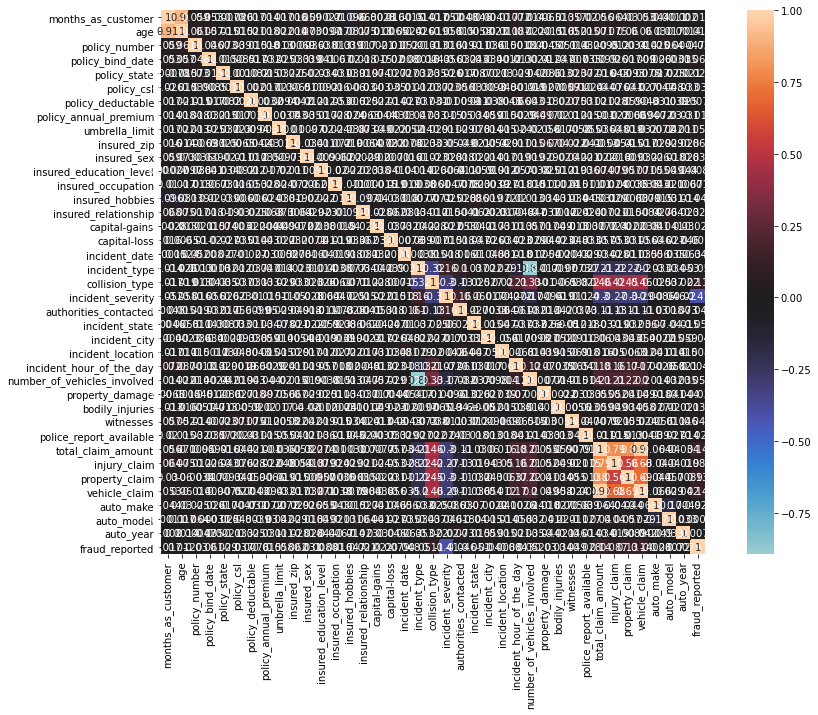

In [13]:
#Analysing the data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

<Figure size 720x720 with 0 Axes>

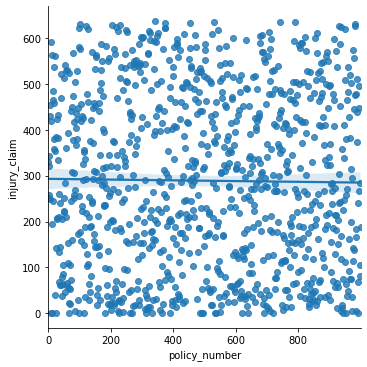

In [17]:
fig = plt.figure(figsize=(10,10))
sns.lmplot(x='policy_number', y='injury_claim', data = df)
plt.show()

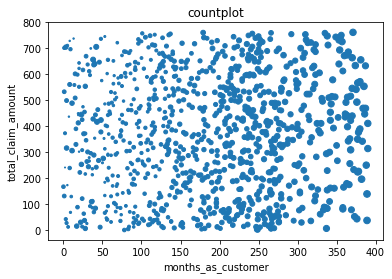

In [20]:
plt.scatter(x = df['months_as_customer'], y = df['total_claim_amount'], s = df['age'])
plt.title('countplot')
plt.xlabel('months_as_customer')
plt.ylabel('total_claim_amount')
plt.show()

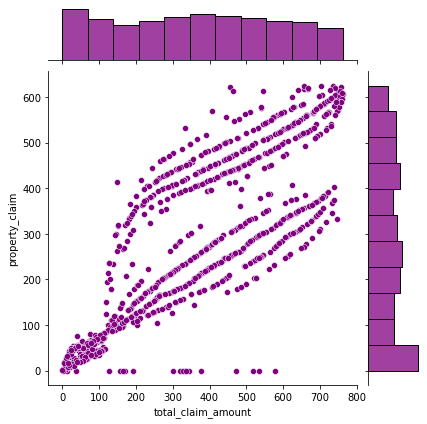

In [23]:
sns.jointplot(x='total_claim_amount',y='property_claim',data=df, color='purple')

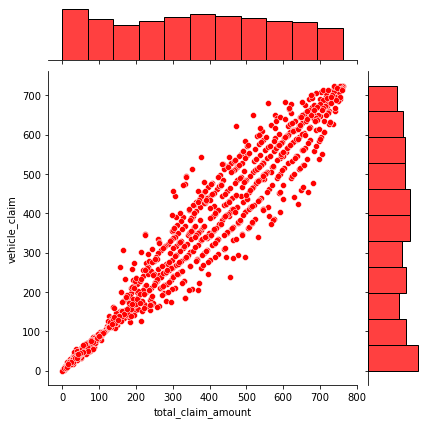

In [24]:
sns.jointplot(x='total_claim_amount',y='vehicle_claim',data=df, color='red')

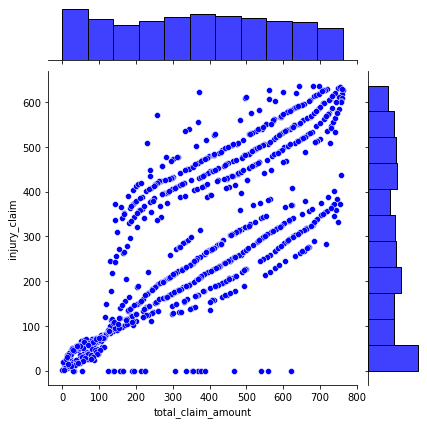

In [28]:
sns.jointplot(x='total_claim_amount',y='injury_claim',data=df, color='blue')

<AxesSubplot:xlabel='policy_annual_premium', ylabel='count'>

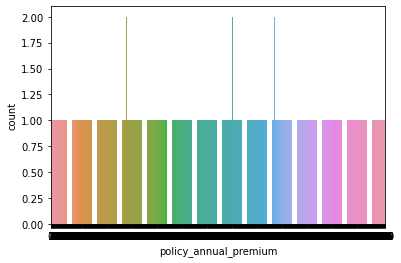

In [29]:
sns.countplot(x='policy_annual_premium',data=df)

In [ ]:
# droping columns based on above result
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

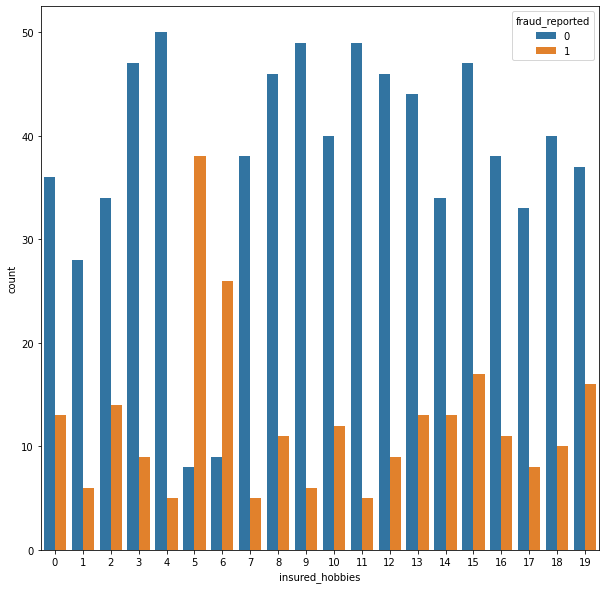

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [33]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 39)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

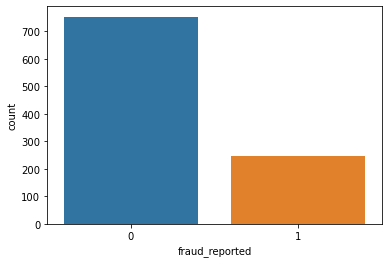

In [34]:
sns.countplot(x='fraud_reported',data=df)

Text(0.5, 1.0, 'vehicle claim in particular age')

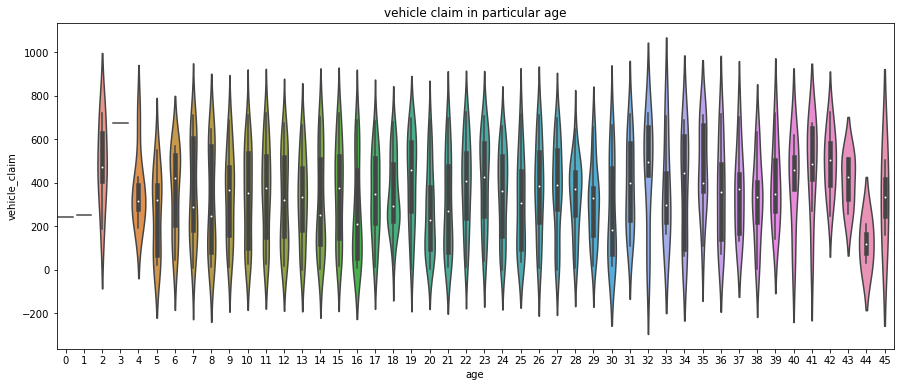

In [36]:
plt.figure(figsize = (15, 6))
sns.violinplot(x = 'age', y = 'vehicle_claim', data = df)
plt.title('vehicle claim in particular age')

# Data Processing

In [37]:
#Getting x and y from the dataset
x= df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [41]:
algorithmPerfomanceDict = {}

In [42]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
logisticRegressionScore = lr.score(x_test, y_test)
print("Score of Logistic Regression : {0}".format(logisticRegressionScore))
algorithmPerfomanceDict['LogisticRegression'] = logisticRegressionScore

Score of Logistic Regression : 0.7633333333333333


In [43]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(x_train, y_train)
knnScore = knn.score(x_test, y_test)
print("Score of KNN Regression : {0}".format(knnScore))
algorithmPerfomanceDict['KNeighborsClassifier'] = knnScore

Score of KNN Regression : 0.6733333333333333


In [44]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)
naiveBayesScore = nb.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ", naiveBayesScore)
algorithmPerfomanceDict['NaiveBayesClassifier'] = naiveBayesScore

Accuracy of Naive Bayes Classifier is :  0.7166666666666667


In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
decisionTreeScore = dtc.score(x_test, y_test)
print("Accuracy of Decision Tree Classifier is : ", decisionTreeScore)
algorithmPerfomanceDict['DecisionTreeClassifier'] = decisionTreeScore

Accuracy of Decision Tree Classifier is :  0.78


In [46]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfc.fit(x_train, y_train)
randomForestScore = rfc.score(x_test, y_test)
print("Accuracy of Random Forest Classifier is : ", randomForestScore)
algorithmPerfomanceDict['RandomForestClassifier'] = randomForestScore

Accuracy of Random Forest Classifier is :  0.81


The DecissionTressClassifier has the best score 78% and it is the best model